In [13]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [14]:
# Global variable
TRAINING: str = "TRAINING"
TEST: str = "TEST"


# Modifying the values
SHOULD_DROP_NA: bool = True # If True just drops all NA; if False applies another logic

# Logic to adapt if not
SHOULD_USE_AVG: bool = True # Replace Nan values by average if continuous values else uses interpolation

# Opening data and comparing data

*sources*:
- [kaggle data visualisation notebook](https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python)

## Ionizable

In [15]:
df_ionizable_train: pd.DataFrame = pd.read_csv("../Data/ionizable_dataset_72_train_divprio.csv", delimiter=';')
df_ionizable_test: pd.DataFrame = pd.read_csv("../Data/ionizable_dataset_72_test_divprio.csv", delimiter=';')
print("===== TRAIN =====")
display(df_ionizable_train.head())
print(">>> Rows and features")
display(df_ionizable_train.shape)
print("===== TEST =====")
display(df_ionizable_test.head())
print(">>> Rows and features")
display(df_ionizable_test.shape)

===== TRAIN =====


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,0.711807,26.275103,349.46716,242.22882,107.23836,264.31046,85.156723,0,0,6,...,113.125,38.250,12.625,1.25,0.000,0,136.21800,126,9,44
1,0.793092,25.823965,413.37534,175.84161,237.53374,131.72211,281.653260,1,3,5,...,27.875,0.000,0.000,0.00,0.000,0,237.15100,580,20,86
2,-1.301030,25.685896,360.75131,232.50258,128.24873,238.14108,122.610240,0,2,0,...,3.375,0.000,0.000,0.00,0.000,0,143.20599,131,10,38
3,-1.301030,18.059965,295.84061,129.55249,166.28812,165.86299,129.977600,1,2,6,...,25.375,7.750,3.375,1.00,0.125,0,137.11400,114,12,46
4,0.255273,53.428448,573.00171,387.61703,185.38469,426.20108,146.800640,2,0,12,...,92.750,14.625,4.875,1.00,0.000,0,325.40698,1298,39,126


>>> Rows and features


(58, 479)

===== TEST =====


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,-0.530178,49.570274,561.79968,267.19226,262.834690,309.97708,251.82259,3,2,6,...,110.50,36.250,14.750,3.875,0.000,0,348.40298,1365,39,132
1,-1.698970,50.500687,558.84418,236.19672,291.529910,293.11432,265.72986,2,4,6,...,34.75,0.000,0.000,0.000,0.000,0,376.38901,1651,43,142
2,-1.397940,65.462685,758.27393,371.97479,350.024600,313.36160,444.91232,7,3,5,...,180.25,37.875,14.000,4.750,0.625,0,552.57300,4386,59,192
3,0.334454,49.855446,487.60828,387.69373,99.914536,380.27148,107.33679,3,0,6,...,59.00,11.375,4.625,1.125,0.000,0,300.37799,824,51,136
4,-0.167491,46.162067,556.22620,315.47986,240.746310,391.94083,164.28537,1,0,12,...,113.25,33.125,11.000,1.750,0.000,0,310.33899,1148,30,108


>>> Rows and features


(14, 479)

## Neutral

In [16]:
df_neutral_train: pd.DataFrame = pd.read_csv("../Data/neutral_dataset_111_train_divprio.csv", delimiter=';')
df_neutral_test: pd.DataFrame = pd.read_csv("../Data/neutral_dataset_111_test_divprio.csv", delimiter=';')
print("===== TRAIN =====")
display(df_neutral_train.head())
print(">>> Rows and features")
display(df_neutral_train.shape)

print("===== TEST =====")
display(df_neutral_test.head())
print(">>> Rows and features")
display(df_neutral_test.shape)

===== TRAIN =====


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,-0.119186,22.785137,341.43088,196.220180,145.210690,239.01727,102.41361,2,0,6,...,64.000,22.375,9.625,3.000,0.000,0.0,151.16499,166,11,50
1,0.363698,43.759998,488.54459,0.000000,488.544590,0.00000,488.54459,0,0,0,...,0.250,0.000,0.000,0.000,0.000,0.0,545.54596,680,78,172
2,0.698970,30.486586,498.01099,58.344425,439.666560,0.00000,498.01099,2,0,0,...,80.625,33.000,13.750,4.625,0.125,0.0,499.14099,1864,72,164
3,-0.050610,8.322758,197.57458,106.382390,91.192207,133.01698,64.55761,1,0,0,...,19.250,6.250,2.750,0.750,0.000,0.0,46.06900,4,0,6
4,-0.130768,39.397514,478.52527,307.091030,171.434250,333.33282,145.19243,5,0,16,...,54.250,0.000,0.000,0.000,0.000,0.0,306.27600,1000,30,116


>>> Rows and features


(89, 479)

===== TEST =====


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,0.172137,36.867172,498.12390,90.310730,405.87415,498.12390,0.0,0,0,12,...,53.750,0.0,0.0,0.0,0,0,360.88199,580,30,94
1,0.561543,38.380379,509.62424,86.720169,422.32901,509.62424,0.0,0,0,12,...,50.375,0.0,0.0,0.0,0,0,395.32700,650,35,100
2,0.463998,38.380379,511.85873,79.011894,432.55930,511.85873,0.0,0,0,12,...,54.500,0.0,0.0,0.0,0,0,395.32700,642,34,100
3,0.558712,38.380379,502.14569,81.493713,420.36444,502.14569,0.0,0,0,12,...,45.250,0.0,0.0,0.0,0,0,395.32700,634,35,100
4,0.691549,38.380379,506.02533,75.370956,430.36685,506.02533,0.0,0,0,12,...,48.625,0.0,0.0,0.0,0,0,395.32700,626,34,100


>>> Rows and features


(22, 479)

## Full

In [17]:
df_full_train: pd.DataFrame = pd.read_csv("../Data/full_dataset_train_divprio.csv", delimiter=';')
df_full_test: pd.DataFrame = pd.read_csv("../Data/full_dataset_test_divprio.csv", delimiter=';')


print("===== TRAIN =====")
display(df_full_train.head())
print(">>> Rows and features")
display(df_full_train.shape)

print("===== TEST =====")
display(df_full_test.head())
print(">>> Rows and features")
display(df_full_test.shape)


===== TRAIN =====


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,-0.119186,22.785137,341.43088,196.220180,145.210690,239.01727,102.41361,2,0,6,...,64.000,22.375,9.625,3.000,0.000,0.0,151.16499,166,11,50
1,0.363698,43.759998,488.54459,0.000000,488.544590,0.00000,488.54459,0,0,0,...,0.250,0.000,0.000,0.000,0.000,0.0,545.54596,680,78,172
2,0.698970,30.486586,498.01099,58.344425,439.666560,0.00000,498.01099,2,0,0,...,80.625,33.000,13.750,4.625,0.125,0.0,499.14099,1864,72,164
3,0.761176,38.435482,528.63080,414.456510,114.174280,291.23990,237.39088,2,0,5,...,190.000,53.375,19.625,5.000,0.375,0.0,253.35400,664,18,74
4,-0.050610,8.322758,197.57458,106.382390,91.192207,133.01698,64.55761,1,0,0,...,19.250,6.250,2.750,0.750,0.000,0.0,46.06900,4,0,6


>>> Rows and features


(146, 479)

===== TEST =====


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,0.538977,36.335587,479.30493,79.206154,389.74368,469.82861,9.476298,0,0,13,...,51.500,0.0,0.0,0.0,0,0,374.86499,613,37,108
1,0.889231,36.335587,487.70731,80.014854,397.33737,481.38589,6.321409,0,0,13,...,50.625,0.0,0.0,0.0,0,0,374.86499,616,37,108
2,0.819654,34.822380,468.08173,91.811241,365.91544,457.55453,10.527193,0,0,13,...,38.125,0.0,0.0,0.0,0,0,340.41998,541,33,102
3,0.350319,40.164001,532.39777,87.560234,444.83752,532.39777,0.000000,0,0,12,...,91.625,0.0,0.0,0.0,0,0,459.75400,915,47,124
4,-0.359296,39.362000,511.36078,68.310173,432.51224,507.88873,3.472069,0,0,13,...,72.125,0.0,0.0,0.0,0,0,443.75497,775,45,120


>>> Rows and features


(37, 479)

## Comparing full with ionizable and neutral
Comparison done to check the header differences between all dataframe and see if some need to be merged together

In [18]:
# Difference of headers in the dataframe
print("===== HEADER COMPARISON =====")
print("> TRAIN")
print(">>> NEUTRAL VS FULL")
display(len(df_neutral_train.columns.difference(df_full_train.columns)))
print(">>> FULL VS NEUTRAL")
display(len(df_full_train.columns.difference(df_neutral_train.columns)))

print(">>> IONIZABLE VS FULL")
display(len(df_ionizable_train.columns.difference(df_full_train.columns)))
print(">>> FULL VS IONIZABLE")
display(len(df_full_train.columns.difference(df_ionizable_train.columns)))

print(">>> NEUTRAL VS IONIZABLE")
display(len(df_neutral_train.columns.difference(df_ionizable_train.columns)))

print(">>> IONIZABLE VS NEUTRAL")
display(len(df_ionizable_train.columns.difference(df_neutral_train.columns)))



print("> TEST")
print(">>> NEUTRAL VS FULL")
display(len(df_neutral_test.columns.difference(df_full_test.columns)))
print(">>> FULL VS NEUTRAL")
display(len(df_full_test.columns.difference(df_neutral_test.columns)))

print(">>> IONIZABLE VS FULL")
display(len(df_ionizable_test.columns.difference(df_full_test.columns)))
print(">>> FULL VS IONIZABLE")
display(len(df_full_test.columns.difference(df_ionizable_test.columns)))

print(">>> NEUTRAL VS IONIZABLE")
display(len(df_neutral_test.columns.difference(df_ionizable_test.columns)))

print(">>> IONIZABLE VS NEUTRAL")
display(len(df_ionizable_test.columns.difference(df_neutral_test.columns)))

===== HEADER COMPARISON =====
> TRAIN
>>> NEUTRAL VS FULL


0

>>> FULL VS NEUTRAL


0

>>> IONIZABLE VS FULL


0

>>> FULL VS IONIZABLE


0

>>> NEUTRAL VS IONIZABLE


0

>>> IONIZABLE VS NEUTRAL


0

> TEST
>>> NEUTRAL VS FULL


0

>>> FULL VS NEUTRAL


0

>>> IONIZABLE VS FULL


0

>>> FULL VS IONIZABLE


0

>>> NEUTRAL VS IONIZABLE


0

>>> IONIZABLE VS NEUTRAL


0

# Describing and cleaning the data

## Ionizable

### Values and missing values

In [19]:
print("===== BASIC DATA OVERVIEW (TRAIN) =====")
print(">>> Description")
display(df_ionizable_train.describe())
print(">>> Info")
display(df_ionizable_train.info(verbose=True))
print("===== COLS WITH NAN VALUES =====")
display(df_ionizable_train.isna().sum())

print("===== BASIC DATA OVERVIEW (TEST) =====")
print(">>> Description")
display(df_ionizable_test.describe())
print(">>> Info")
display(df_ionizable_test.info(verbose=True))
print("===== COLS WITH NAN VALUES =====")
display(df_ionizable_test.isna().sum())

===== BASIC DATA OVERVIEW (TRAIN) =====
>>> Description


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.0,58.000000,58.000000,58.000000,58.000000
mean,-0.193418,48.931856,546.808675,349.373759,194.552224,394.809622,151.999057,2.051724,0.637931,8.620690,...,100.760776,24.411638,8.879310,2.043103,0.081897,0.0,313.266339,1376.431034,34.413793,111.931034
std,0.705376,15.945415,119.585499,106.296749,70.212878,121.114319,90.307555,2.081012,1.037850,4.221198,...,56.242623,18.915425,7.232244,2.058965,0.186660,0.0,109.145602,1414.512874,16.896002,41.609657
min,-2.259637,18.059965,295.840610,118.873230,68.862923,97.029968,39.299633,0.000000,0.000000,0.000000,...,3.375000,0.000000,0.000000,0.000000,0.000000,0.0,136.218000,114.000000,9.000000,38.000000
25%,-0.431798,39.435989,475.798502,275.327828,149.002465,324.064768,92.200664,1.000000,0.000000,6.000000,...,62.656250,11.656250,4.343750,0.531250,0.000000,0.0,253.603750,650.750000,24.250000,87.000000
50%,-0.023676,48.002051,538.751740,361.514160,182.802255,406.328935,122.527965,1.500000,0.000000,9.500000,...,99.625000,25.187500,8.125000,1.312500,0.000000,0.0,298.560990,930.000000,32.500000,105.000000
75%,0.339801,53.987316,605.620958,410.803538,232.416348,455.076975,184.903485,3.000000,2.000000,12.000000,...,135.500000,37.937500,12.875000,3.187500,0.000000,0.0,339.740000,1566.500000,41.250000,131.000000
max,0.793092,121.987920,896.699710,674.181880,449.023770,725.847960,470.867030,12.000000,4.000000,17.000000,...,262.750000,72.375000,28.875000,8.125000,0.875000,0.0,734.945010,8842.000000,101.000000,270.000000


>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 479 columns):
 #    Column          Dtype  
---   ------          -----  
 0    Log_MP_RATIO    float64
 1    apol            float64
 2    ASA             float64
 3    ASA+            float64
 4    ASA-            float64
 5    ASA_H           float64
 6    ASA_P           float64
 7    a_acc           int64  
 8    a_acid          int64  
 9    a_aro           int64  
 10   a_base          int64  
 11   a_count         int64  
 12   a_don           int64  
 13   a_donacc        int64  
 14   a_heavy         int64  
 15   a_hyd           int64  
 16   a_IC            float64
 17   a_ICM           float64
 18   a_nB            int64  
 19   a_nBr           int64  
 20   a_nC            int64  
 21   a_nCl           int64  
 22   a_nF            int64  
 23   a_nH            int64  
 24   a_nI            int64  
 25   a_nN            int64  
 26   a_nO            int64  
 27   a_nP       

None

===== COLS WITH NAN VALUES =====


Log_MP_RATIO    0
apol            0
ASA             0
ASA+            0
ASA-            0
               ..
vsurf_Wp8       0
Weight          0
weinerPath      0
weinerPol       0
zagreb          0
Length: 479, dtype: int64

===== BASIC DATA OVERVIEW (TEST) =====
>>> Description


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,14.000000
mean,-0.389061,54.420879,585.290244,369.607896,207.420523,427.683325,157.606922,2.500000,0.642857,7.785714,...,99.258929,22.937500,8.437500,2.080357,0.053571,0.0,348.517564,1640.000000,38.571429,126.000000
std,0.753420,13.542840,96.787614,90.472124,75.165576,80.951366,113.097632,2.345208,1.336306,3.598687,...,41.217600,12.819264,4.978017,1.702379,0.167807,0.0,100.125673,1414.677348,13.403296,36.894861
min,-1.698970,45.533447,487.608280,236.196720,80.522285,293.114320,38.270668,0.000000,0.000000,0.000000,...,34.750000,0.000000,0.000000,0.000000,0.000000,0.0,260.356990,759.000000,21.000000,84.000000
25%,-0.902542,47.277533,525.792160,313.754687,149.730255,383.188818,89.814440,1.000000,0.000000,6.000000,...,78.343750,13.718750,4.781250,1.187500,0.000000,0.0,283.906490,800.000000,30.500000,103.000000
50%,-0.331171,50.178066,557.535190,363.106595,219.140205,445.226850,106.645155,2.000000,0.000000,6.000000,...,96.312500,20.562500,7.937500,1.687500,0.000000,0.0,313.607500,1027.000000,34.000000,110.000000
75%,0.240546,55.297703,616.793795,412.299070,252.565718,474.025685,229.938285,3.000000,0.000000,11.500000,...,107.437500,31.875000,10.625000,2.000000,0.000000,0.0,366.760745,1585.750000,42.000000,137.500000
max,0.617000,97.551239,814.912720,588.984500,350.024600,549.115600,444.912320,8.000000,4.000000,12.000000,...,183.875000,47.250000,18.750000,6.125000,0.625000,0.0,582.755000,5278.000000,70.000000,212.000000


>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 479 columns):
 #    Column          Dtype  
---   ------          -----  
 0    Log_MP_RATIO    float64
 1    apol            float64
 2    ASA             float64
 3    ASA+            float64
 4    ASA-            float64
 5    ASA_H           float64
 6    ASA_P           float64
 7    a_acc           int64  
 8    a_acid          int64  
 9    a_aro           int64  
 10   a_base          int64  
 11   a_count         int64  
 12   a_don           int64  
 13   a_donacc        int64  
 14   a_heavy         int64  
 15   a_hyd           int64  
 16   a_IC            float64
 17   a_ICM           float64
 18   a_nB            int64  
 19   a_nBr           int64  
 20   a_nC            int64  
 21   a_nCl           int64  
 22   a_nF            int64  
 23   a_nH            int64  
 24   a_nI            int64  
 25   a_nN            int64  
 26   a_nO            int64  
 27   a_nP       

None

===== COLS WITH NAN VALUES =====


Log_MP_RATIO    0
apol            0
ASA             0
ASA+            0
ASA-            0
               ..
vsurf_Wp8       0
Weight          0
weinerPath      0
weinerPol       0
zagreb          0
Length: 479, dtype: int64

## Neutral

### Values and missing values

In [20]:
print("===== BASIC DATA OVERVIEW (TRAIN) =====")
print(">>> Description")
display(df_neutral_train.describe())
print(">>> Info")
display(df_neutral_train.info(verbose=True))
print("===== COLS WITH NAN VALUES =====")
display(df_neutral_train.isna().sum())

print("===== BASIC DATA OVERVIEW (TEST) =====")
print(">>> Description")
display(df_neutral_test.describe())
print(">>> Info")
display(df_neutral_test.info(verbose=True))
print("===== COLS WITH NAN VALUES =====")
display(df_neutral_test.isna().sum())

===== BASIC DATA OVERVIEW (TRAIN) =====
>>> Description


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.205050,39.213344,492.867794,189.358713,302.016805,391.694980,101.172813,1.505618,0.134831,8.921348,...,68.057584,9.712079,3.780899,1.129213,0.116573,0.014045,358.253496,865.595506,33.157303,101.573034
std,0.551593,13.463072,104.785824,134.880187,132.590706,152.233089,117.607082,2.078699,0.504322,4.548288,...,41.516422,16.528045,6.833586,2.250982,0.523523,0.132500,148.898579,1573.746093,15.804127,37.437793
min,-1.000000,8.322758,197.574580,0.000000,64.410759,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,46.069000,4.000000,0.000000,6.000000
25%,-0.159894,34.822380,450.575990,90.301811,182.822480,272.204560,0.000000,0.000000,0.000000,6.000000,...,42.125000,0.000000,0.000000,0.000000,0.000000,0.000000,268.743990,488.000000,25.000000,86.000000
50%,0.269513,37.137585,490.290860,141.864210,332.514560,438.416870,75.795723,1.000000,0.000000,12.000000,...,56.375000,0.000000,0.000000,0.000000,0.000000,0.000000,344.495000,612.000000,30.000000,96.000000
75%,0.667194,42.087173,532.397770,263.049500,399.243130,501.342380,145.247270,2.000000,0.000000,12.000000,...,84.375000,14.750000,5.750000,1.375000,0.000000,0.000000,406.898990,791.000000,40.000000,116.000000
max,1.311038,126.062750,1094.164700,794.894100,625.281980,704.761290,498.010990,13.000000,2.000000,17.000000,...,205.250000,68.625000,27.375000,11.125000,4.625000,1.250000,959.170960,14940.000000,113.000000,320.000000


>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 479 columns):
 #    Column          Dtype  
---   ------          -----  
 0    Log_MP_RATIO    float64
 1    apol            float64
 2    ASA             float64
 3    ASA+            float64
 4    ASA-            float64
 5    ASA_H           float64
 6    ASA_P           float64
 7    a_acc           int64  
 8    a_acid          int64  
 9    a_aro           int64  
 10   a_base          int64  
 11   a_count         int64  
 12   a_don           int64  
 13   a_donacc        int64  
 14   a_heavy         int64  
 15   a_hyd           int64  
 16   a_IC            float64
 17   a_ICM           float64
 18   a_nB            int64  
 19   a_nBr           int64  
 20   a_nC            int64  
 21   a_nCl           int64  
 22   a_nF            int64  
 23   a_nH            int64  
 24   a_nI            int64  
 25   a_nN            int64  
 26   a_nO            int64  
 27   a_nP       

None

===== COLS WITH NAN VALUES =====


Log_MP_RATIO    0
apol            0
ASA             0
ASA+            0
ASA-            0
               ..
vsurf_Wp8       0
Weight          0
weinerPath      0
weinerPol       0
zagreb          0
Length: 479, dtype: int64

===== BASIC DATA OVERVIEW (TEST) =====
>>> Description


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.0,22.0,22.000000,22.000000,22.000000,22.000000
mean,0.463298,36.260081,481.776489,96.049504,384.798805,461.973113,19.803375,0.181818,0.0,11.136364,...,44.346591,0.721591,0.244318,0.079545,0.0,0.0,358.877679,560.045455,31.136364,93.000000
std,0.279653,4.477118,49.611632,45.466567,89.548391,110.366487,71.153459,0.852803,0.0,2.899843,...,14.672919,3.061117,1.145954,0.373101,0.0,0.0,77.236318,185.800322,7.285311,14.432107
min,-0.161151,23.658344,341.985020,34.995163,81.638962,61.816746,0.000000,0.000000,0.0,0.000000,...,17.750000,0.000000,0.000000,0.000000,0.0,0.0,180.166990,174.000000,21.000000,60.000000
25%,0.343768,33.840759,455.034967,72.344755,334.419340,455.034967,0.000000,0.000000,0.0,12.000000,...,30.812500,0.000000,0.000000,0.000000,0.0,0.0,291.992000,422.250000,24.000000,82.000000
50%,0.543557,38.380379,503.208875,80.391411,421.346725,503.208875,0.000000,0.000000,0.0,12.000000,...,50.125000,0.000000,0.000000,0.000000,0.0,0.0,395.327000,630.000000,34.000000,100.000000
75%,0.665917,38.380379,511.350437,119.223663,432.979248,511.350437,0.000000,0.000000,0.0,12.000000,...,54.125000,0.000000,0.000000,0.000000,0.0,0.0,395.327000,651.500000,35.000000,100.000000
max,1.041625,42.919998,540.454650,260.346040,500.342440,540.454650,317.939330,4.000000,0.0,12.000000,...,64.500000,14.375000,5.375000,1.750000,0.0,0.0,498.661990,907.000000,46.000000,118.000000


>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 479 columns):
 #    Column          Dtype  
---   ------          -----  
 0    Log_MP_RATIO    float64
 1    apol            float64
 2    ASA             float64
 3    ASA+            float64
 4    ASA-            float64
 5    ASA_H           float64
 6    ASA_P           float64
 7    a_acc           int64  
 8    a_acid          int64  
 9    a_aro           int64  
 10   a_base          int64  
 11   a_count         int64  
 12   a_don           int64  
 13   a_donacc        int64  
 14   a_heavy         int64  
 15   a_hyd           int64  
 16   a_IC            float64
 17   a_ICM           float64
 18   a_nB            int64  
 19   a_nBr           int64  
 20   a_nC            int64  
 21   a_nCl           int64  
 22   a_nF            int64  
 23   a_nH            int64  
 24   a_nI            int64  
 25   a_nN            int64  
 26   a_nO            int64  
 27   a_nP       

None

===== COLS WITH NAN VALUES =====


Log_MP_RATIO    0
apol            0
ASA             0
ASA+            0
ASA-            0
               ..
vsurf_Wp8       0
Weight          0
weinerPath      0
weinerPol       0
zagreb          0
Length: 479, dtype: int64

## Full

### Values and missing values

In [21]:
print("===== BASIC DATA OVERVIEW (TRAIN) =====")
print(">>> Description")
display(df_full_train.describe())
print(">>> Info")
display(df_full_train.info(verbose=True))
print("===== COLS WITH NAN VALUES =====")
display(df_full_train.isna().sum())

print("===== BASIC DATA OVERVIEW (TEST) =====")
print(">>> Description")
display(df_full_test.describe())
print(">>> Info")
display(df_full_test.info(verbose=True))
print("===== COLS WITH NAN VALUES =====")
display(df_full_test.isna().sum())

===== BASIC DATA OVERVIEW (TRAIN) =====
>>> Description


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,-0.037626,44.713290,523.422960,278.826194,242.218148,387.070649,136.352312,1.972603,0.397260,8.349315,...,85.479452,17.716610,6.605308,1.693493,0.108733,0.008562,339.363061,1168.938356,34.226027,108.273973
std,0.670619,15.944047,118.856771,143.077179,118.670391,140.067772,109.051699,2.139756,0.890404,4.401555,...,51.077331,18.726855,7.361226,2.231296,0.426560,0.103451,138.945211,1590.612678,16.678613,41.149437
min,-2.259637,8.322758,197.574580,0.000000,64.410759,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,46.069000,4.000000,0.000000,6.000000
25%,-0.425336,35.761043,466.609140,182.358847,157.780025,300.612572,65.432325,0.000000,0.000000,6.000000,...,47.468750,0.000000,0.000000,0.000000,0.000000,0.000000,256.142260,528.500000,24.250000,86.000000
50%,-0.013251,42.889172,510.104235,273.280885,208.773565,403.971465,119.773765,2.000000,0.000000,9.500000,...,79.625000,14.625000,4.875000,1.000000,0.000000,0.000000,314.666505,734.000000,31.000000,102.000000
75%,0.470817,51.779402,579.544525,378.712695,306.548475,479.892145,186.266363,3.000000,0.000000,12.000000,...,110.187500,30.218750,11.000000,2.250000,0.000000,0.000000,394.292995,1276.750000,41.750000,128.000000
max,1.311038,126.062750,1094.164700,794.894100,625.281980,725.847960,498.010990,13.000000,4.000000,17.000000,...,262.750000,72.375000,28.875000,11.125000,4.625000,1.250000,959.170960,14940.000000,113.000000,320.000000


>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 479 columns):
 #    Column          Dtype  
---   ------          -----  
 0    Log_MP_RATIO    float64
 1    apol            float64
 2    ASA             float64
 3    ASA+            float64
 4    ASA-            float64
 5    ASA_H           float64
 6    ASA_P           float64
 7    a_acc           int64  
 8    a_acid          int64  
 9    a_aro           int64  
 10   a_base          int64  
 11   a_count         int64  
 12   a_don           int64  
 13   a_donacc        int64  
 14   a_heavy         int64  
 15   a_hyd           int64  
 16   a_IC            float64
 17   a_ICM           float64
 18   a_nB            int64  
 19   a_nBr           int64  
 20   a_nC            int64  
 21   a_nCl           int64  
 22   a_nF            int64  
 23   a_nH            int64  
 24   a_nI            int64  
 25   a_nN            int64  
 26   a_nO            int64  
 27   a_nP     

None

===== COLS WITH NAN VALUES =====


Log_MP_RATIO    0
apol            0
ASA             0
ASA+            0
ASA-            0
               ..
vsurf_Wp8       0
Weight          0
weinerPath      0
weinerPol       0
zagreb          0
Length: 479, dtype: int64

===== BASIC DATA OVERVIEW (TEST) =====
>>> Description


,Log_MP_RATIO,apol,ASA,ASA+,ASA-,ASA_H,ASA_P,a_acc,a_acid,a_aro,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.0,37.0,37.000000,37.000000,37.000000,37.000000
mean,0.466767,36.743485,485.230563,99.880510,382.949623,470.228960,15.001603,0.108108,0.0,11.594595,...,48.283784,0.827703,0.287162,0.070946,0.0,0.0,358.960994,580.729730,31.756757,95.513514
std,0.308726,4.258958,40.495030,50.856481,76.259088,86.244466,56.494545,0.657596,0.0,2.302890,...,16.284836,3.335201,1.217945,0.318062,0.0,0.0,65.175265,169.053681,6.909757,13.795373
min,-0.359296,23.658344,341.985020,34.995163,81.638962,61.816746,0.000000,0.000000,0.0,0.000000,...,17.750000,0.000000,0.000000,0.000000,0.0,0.0,180.166990,174.000000,21.000000,60.000000
25%,0.329167,34.822380,468.081730,75.069984,344.058590,458.915130,0.000000,0.000000,0.0,12.000000,...,38.125000,0.000000,0.000000,0.000000,0.0,0.0,316.876010,488.000000,27.000000,88.000000
50%,0.561432,36.867172,497.625700,90.301811,397.337370,493.633610,0.000000,0.000000,0.0,12.000000,...,50.000000,0.000000,0.000000,0.000000,0.0,0.0,360.881990,580.000000,31.000000,94.000000
75%,0.678482,38.380379,509.825560,104.990330,430.366850,507.888730,0.000000,0.000000,0.0,12.000000,...,54.250000,0.000000,0.000000,0.000000,0.0,0.0,395.327000,650.000000,35.000000,106.000000
max,1.041625,50.529068,540.454650,313.179630,500.342440,540.454650,317.939330,4.000000,0.0,13.000000,...,91.625000,14.750000,5.375000,1.750000,0.0,0.0,498.661990,915.000000,47.000000,124.000000


>>> Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 479 columns):
 #    Column          Dtype  
---   ------          -----  
 0    Log_MP_RATIO    float64
 1    apol            float64
 2    ASA             float64
 3    ASA+            float64
 4    ASA-            float64
 5    ASA_H           float64
 6    ASA_P           float64
 7    a_acc           int64  
 8    a_acid          int64  
 9    a_aro           int64  
 10   a_base          int64  
 11   a_count         int64  
 12   a_don           int64  
 13   a_donacc        int64  
 14   a_heavy         int64  
 15   a_hyd           int64  
 16   a_IC            float64
 17   a_ICM           float64
 18   a_nB            int64  
 19   a_nBr           int64  
 20   a_nC            int64  
 21   a_nCl           int64  
 22   a_nF            int64  
 23   a_nH            int64  
 24   a_nI            int64  
 25   a_nN            int64  
 26   a_nO            int64  
 27   a_nP       

None

===== COLS WITH NAN VALUES =====


Log_MP_RATIO    0
apol            0
ASA             0
ASA+            0
ASA-            0
               ..
vsurf_Wp8       0
Weight          0
weinerPath      0
weinerPol       0
zagreb          0
Length: 479, dtype: int64

## Comparing FULL dataset vs IONIZABLE + NEUTRAL DATASET

In [22]:
print("===== TRAIN =====")
df_concat_ion_train: pd.DataFrame = pd.concat([df_ionizable_train, df_neutral_train])
df_concat_ion_train = df_concat_ion_train.reset_index(drop=True)
display(df_concat_ion_train.shape)
display(df_full_train.shape)


# https://stackoverflow.com/a/20228113
df_concat_all_train = pd.concat([df_concat_ion_train, df_full_train])
df_concat_all_train = df_concat_all_train.reset_index(drop=True)
df_gpby = df_concat_all_train.groupby(list(df_concat_all_train.columns))
idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]
df_unique_train = df_concat_all_train.reindex(idx)
print(">>> NUMBER OF DIFFERENT VALUES")
display(df_unique_train.shape)


print(">>> VALEURS UNIQUES DANS FULL TRAIN")
print(len(pd.merge(df_unique_train, df_full_train, how="inner")))

print(">>> VALEURS UNIQUES DANS IONIZABLE + NEUTRAL TRAIN")
print(len(pd.merge(df_unique_train, df_concat_ion_train, how="inner")))


print("===== TEST =====")
df_concat_ion_test: pd.DataFrame = pd.concat([df_ionizable_test, df_neutral_test])
df_concat_ion_test = df_concat_ion_test.reset_index(drop=True)
display(df_concat_ion_test.shape)
display(df_full_test.shape)


df_concat_all_test = pd.concat([df_concat_ion_test, df_full_test])
df_concat_all_test = df_concat_all_test.reset_index(drop=True)
df_gpby = df_concat_all_test.groupby(list(df_concat_all_test.columns))
idx = [x[0] for x in df_gpby.groups.values() if len(x) == 1]
df_unique_test = df_concat_all_test.reindex(idx)
print(">>> NUMBER OF DIFFERENT VALUES")
display(df_unique_test.shape)


print(">>> VALEURS UNIQUES DANS FULL test")
print(len(pd.merge(df_unique_test, df_full_test, how="inner")))

print(">>> VALEURS UNIQUES DANS IONIZABLE + NEUTRAL test")
print(len(pd.merge(df_unique_test, df_concat_ion_test, how="inner")))

===== TRAIN =====


(147, 479)

(146, 479)

>>> NUMBER OF DIFFERENT VALUES


(65, 479)

>>> VALEURS UNIQUES DANS FULL TRAIN
32
>>> VALEURS UNIQUES DANS IONIZABLE + NEUTRAL TRAIN
33
===== TEST =====


(36, 479)

(37, 479)

>>> NUMBER OF DIFFERENT VALUES


(29, 479)

>>> VALEURS UNIQUES DANS FULL test
15
>>> VALEURS UNIQUES DANS IONIZABLE + NEUTRAL test


/tmp/ipykernel_2531/631907556.py:42: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  print(len(pd.merge(df_unique_test, df_full_test, how="inner")))


14


Some rows in the full dataset and the neutral / ionizable datasets are shared. Others are unique:
**TRAIN**
- FULL TRAIN: 32
- IONIZABLE / NEUTRAL: 33

**TEST**
- FULL TEST: 15
- IONIZABLE / NEUTRAL: 14


# Visualisation
Here we are taking a quick look at all the numerical data

## Data balance

### TRAIN

<AxesSubplot:xlabel='Type', ylabel='count'>

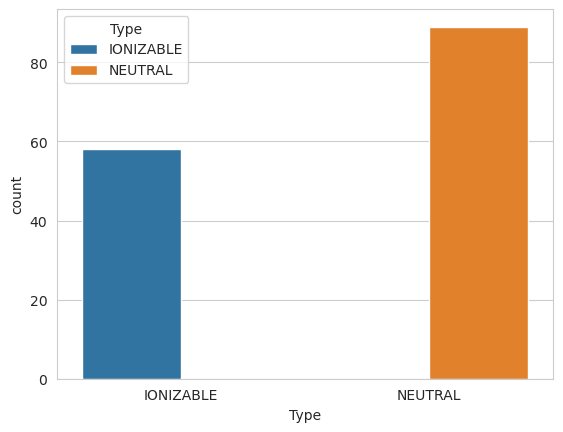

In [41]:
df_ionizable_train["Type"] = "IONIZABLE"
df_neutral_train["Type"] = "NEUTRAL"

df_concat_all_train_typed: pd.DataFrame = pd.concat([df_ionizable_train, df_neutral_train], ignore_index=True)

sns.countplot(data=df_concat_all_train_typed, x="Type", hue="Type")

As we can see the training set for neutral and ionizable molecules are not equal in size
This will be a factor that needs to be taken in account during the training phase when choosing the data